# 행렬 공간(열, 행, 영)

## 영공간

In [1]:
import numpy as np
from scipy import linalg

In [2]:
A = np.array([ [1,-1],[-2,2] ])
B = np.array([ [1,-1],[-2,3] ])

linalg.null_space(A)

array([[0.70710678],
       [0.70710678]])

In [3]:
linalg.null_space(B)

array([], shape=(2, 0), dtype=float64)

In [5]:
np.sqrt(2*0.70710678*0.70710678)

0.9999999983219684

# 연습 문제

**연습 문제 5-1**

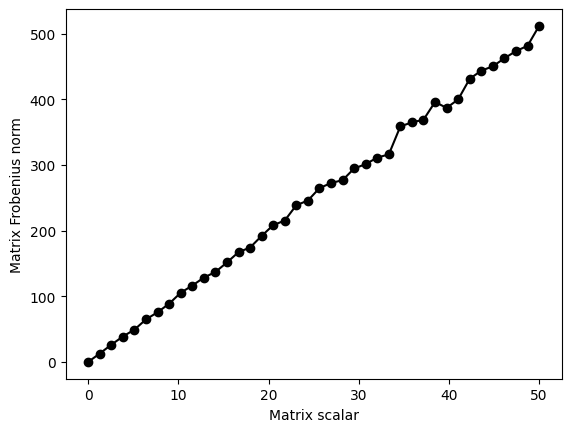

In [64]:
import numpy as np

scale_values = np.linspace(0, 50, 40)
result = np.zeros((40, 10))

for i in range(len(scale_values)):
    for j in range(10):
        A = np.random.randn(10, 10) * scale_values[i]
        result[i, j] = np.linalg.norm(A)
        
plt.plot(scale_values,np.mean(result,axis=1),'ko-')
plt.xlabel('Matrix scalar')
plt.ylabel('Matrix Frobenius norm')
plt.show()

- 정답

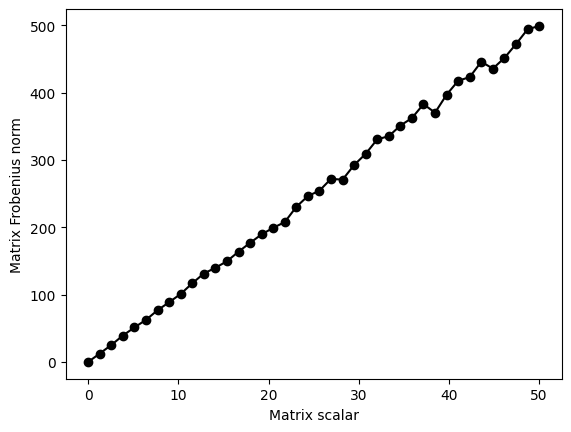

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [56]:
# experiment simulations
scalingVals = np.linspace(0,50,40) # range of scaling parameters (0 to 50 in 40 steps)
nExperiments = 10


# initialize output
matrixNorms = np.zeros((len(scalingVals),nExperiments))

# run experiment!
for si in range(len(scalingVals)):
    for expi in range(nExperiments):

        # generate a random scaled matrix
        R = np.random.randn(10,10) * scalingVals[si]

        # store its norm
        matrixNorms[si,expi] = np.linalg.norm(R,'fro')


# plot the results!
plt.plot(scalingVals,np.mean(matrixNorms,axis=1),'ko-')
plt.xlabel('Matrix scalar')
plt.ylabel('Matrix Frobenius norm')
plt.show()

# check that norm=0 for zeros matrix
print(matrixNorms[0,:])

**연습 문제 5-2**

In [77]:
def cal_dist(A, B):
    D = A - B
    return np.sqrt(np.sum(D**2))

In [78]:
N = 7
A = np.random.randn(N,N)
B = np.random.randn(N,N)

cal_dist(A, B)

10.467512061613117

In [79]:
s = 1
cnt = 0
while cal_dist(s*A, s*B) > 1:
    s = s*0.9
    cnt += 1
print(cnt-1, s, cal_dist(s*A, s*B))

22 0.08862938119652508 0.9277291166879331


- 정답

In [80]:
# Function to compute Euclidean distance

def EuclideanDistance(M1,M2):
  
  # matrix difference
  D = M1-M2

  # matrix distance
  return np.sqrt(np.sum(D**2))

# optimization
numIters = 0
s = 1
while EuclideanDistance(s*A,s*B)>1:
  s *= .9
  numIters += 1

# report the results. Note that my loop code scales once more after criteria is reached,
# so I subtract one from numIters and undo the final s scaling.
print(f'Number of iterations: {numIters-1}')
print(f'Final value of scalar: {s/.9:.3f}')
print(f'Final Euclidean distance: {EuclideanDistance(s/.9*A,s/.9*B):.3f}')

Number of iterations: 22
Final value of scalar: 0.098
Final Euclidean distance: 1.031


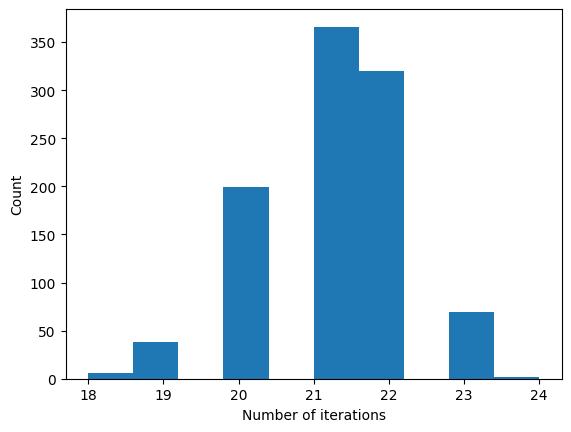

In [81]:
# The code below isn't part of the exercise, but I was curious to repeat the optimization
# 1000 times to see the distribution of numIters

nIters = np.zeros(1000)

for i in range(1000):
  # create two matrices
  A = np.random.randn(N,N)
  B = np.random.randn(N,N)

  numIters,s = 0,1
  while EuclideanDistance(s*A,s*B)>1:
    s *= .9
    numIters += 1
  nIters[i] = numIters-1

plt.hist(nIters)
plt.xlabel('Number of iterations')
plt.ylabel('Count');

**연습 문제 5-3**

In [92]:
M = 2
A = np.random.rand(M,M)
A

array([[0.73684969, 0.79549609],
       [0.55596076, 0.31274332]])

In [99]:
M = 2
A = np.random.rand(M,M)

norm1 = np.sqrt(np.sum(np.diag(A.T@A)))
norm2 = np.sqrt(np.sum(np.diag(A@A.T)))
norm3 = np.sqrt(np.sum(A**2))

In [100]:
np.allclose(norm1, norm3)

True

In [101]:
np.allclose(norm2, norm3)

True

- 정답

In [102]:
# Create a matrix
M = 50
A = np.random.randn(M,M)

# trace method
norm1 = np.sqrt(np.sum(np.diag(A.T@A)))

# Euclidean norm method
norm2 = np.sqrt(np.sum(A**2))

# if they're equal, their difference should be (very close to) zero
norm1-norm2

7.105427357601002e-15

**연습 문제 5-4**

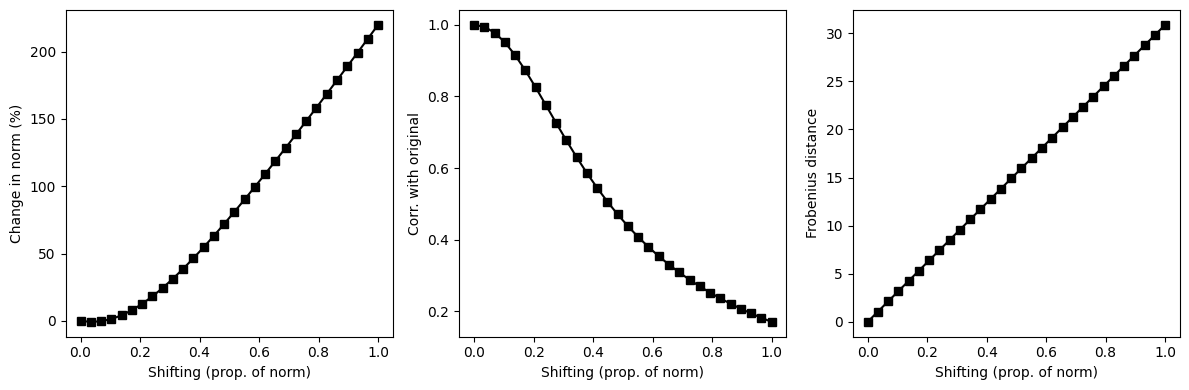

In [134]:
N = 10
A = np.random.randn(N,N)
normA = np.linalg.norm(A,'fro')
steps = np.linspace(0, 1, 30)
A_flat = A.flatten()

results = np.zeros((len(steps), 3))
resultsNames = [ 'Change in norm (%)','Corr. with original','Frobenius distance' ]


for si, step in enumerate(steps):
    AS = A+ np.eye(N, N)*step*normA
    normAS = np.linalg.norm(AS,'fro')   
    AS_flat = AS.flatten()

    results[si,0] = (normAS - normA)/normA*100
    results[si,1] = np.corrcoef(A_flat, AS_flat)[0, 1]
    results[si,2] = np.sqrt(np.sum((A-AS)**2))

## plotting!
_,axs = plt.subplots(1,3,figsize=(12,4))

for i in range(3):

  # plot the results
    axs[i].plot(steps,results[:,i],'ks-')
    axs[i].set_xlabel('Shifting (prop. of norm)')
    axs[i].set_ylabel(resultsNames[i])

plt.tight_layout()
plt.show()    

- 정답

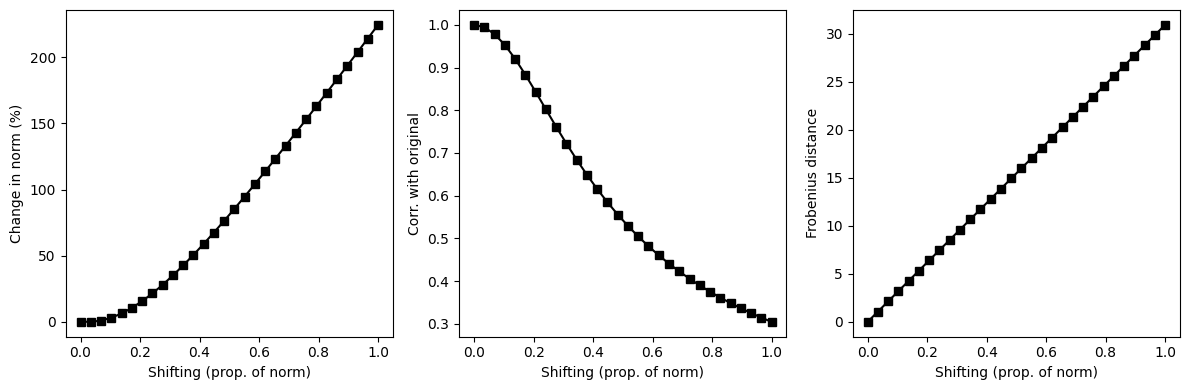

In [127]:
def EuclideanDistance(M1,M2):
  
    # matrix difference
    D = M1-M2

    # matrix distance
    return np.sqrt(np.sum(D**2))

# size of the matrix
N = 10

shifting = np.linspace(0,1,30)

# original matrix
A = np.random.randn(N,N)
normA = np.linalg.norm(A,'fro')

# initialize results matrices
shiftingResults = np.zeros( (len(shifting),3) )
resultsNames = [ 'Change in norm (%)','Corr. with original','Frobenius distance' ]



for si in range(len(shifting)):

    # shift the matrix
    As = A + shifting[si]*normA*np.eye(N)

    # get the new norm and transform to %-change
    normShift = np.linalg.norm(As,'fro')
    shiftingResults[si,0] = 100 * (normShift-normA)/normA

    # compute correlation
    shiftingResults[si,1] = np.corrcoef(A.flatten(),As.flatten())[0,1]

    # Frobenius distance
    shiftingResults[si,2] = EuclideanDistance(A,As)




## plotting!
_,axs = plt.subplots(1,3,figsize=(12,4))

for i in range(3):

    # plot the results
    axs[i].plot(shifting,shiftingResults[:,i],'ks-')
    axs[i].set_xlabel('Shifting (prop. of norm)')
    axs[i].set_ylabel(resultsNames[i])

plt.tight_layout()
plt.show()

**연습 문제 5-5**

In [138]:
def make_rank_matrix(r, M):
    A = np.random.randn(M, r)
    B = np.random.randn(r, M)
    return A@B

C = make_rank_matrix(2, 3)

np.linalg.matrix_rank(C)

2

- 정답

In [139]:
# Make a matrix with specified size and rank

M = 5
N = 8
r = 3

A = np.random.randn(M,r) @ np.random.randn(r,N)

print(A.shape)
print(np.linalg.matrix_rank(A))

(5, 8)
3


**연습 문제 5-6**

In [140]:
A0 = make_rank_matrix(0, 3)
A1 = make_rank_matrix(1, 3)
A2 = make_rank_matrix(2, 3)

In [143]:
np.linalg.matrix_rank(A1), np.linalg.matrix_rank(A2), np.linalg.matrix_rank(A2+A2)

(1, 2, 2)

- 정답

In [144]:
# summed matrix has rank-0

A = np.diag([ 1,0,0,0,0])
B = np.diag([-1,0,0,0,0])
C = A+B

# print out their ranks
np.linalg.matrix_rank(A),np.linalg.matrix_rank(B),np.linalg.matrix_rank(C)

(1, 1, 0)

**연습 문제 5-7**

In [161]:
rs = range(2,16)
rs

range(2, 16)

In [172]:
def make_rank_matrix(r, M):
    A = np.random.randn(M, r)
    B = np.random.randn(r, M)
    return A@B

M = 20
rs = range(2,16)
Ranks = np.zeros((len(rs),len(rs),2))

for i in range(len(rs)):
    for j in range(len(rs)):    
        A = make_rank_matrix(rs[i], M)
        B = make_rank_matrix(rs[j], M)
        Ranks[i, j, 0] = np.linalg.matrix_rank(A+B)
        Ranks[i, j, 1] = np.linalg.matrix_rank(A@B)  

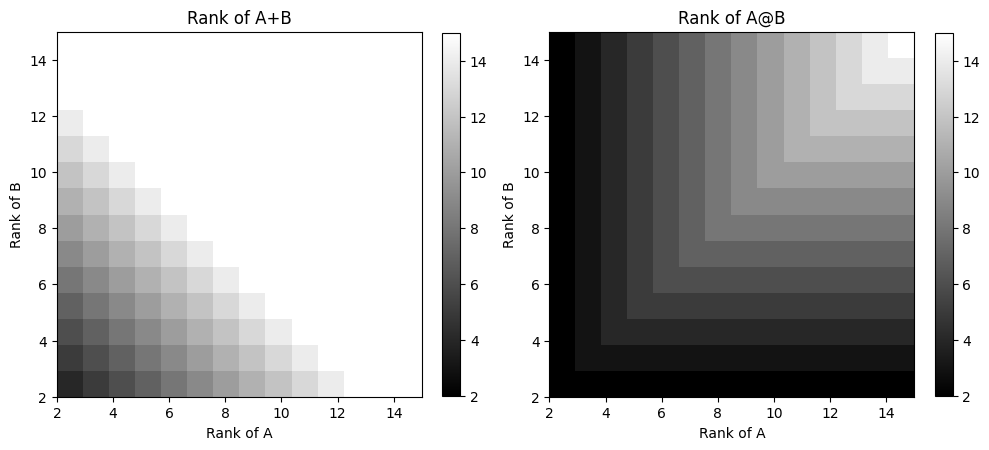

In [173]:
## visualization
fig,axs = plt.subplots(1,2,figsize=(10,6))
s = '+@' # symbols for title

for i in range(2):

    # draw heatmat
    h = axs[i].imshow(Ranks[:,:,i],vmin=np.min(rs),vmax=np.max(rs),origin='lower',
                    extent=(rs[0],rs[-1],rs[0],rs[-1]),cmap='gray')

    # add colorbar and other niceties
    fig.colorbar(h,ax=axs[i],fraction=.045)
    axs[i].set_xlabel('Rank of A')
    axs[i].set_ylabel('Rank of B')
    axs[i].set_title(f'Rank of A{s[i]}B')

plt.tight_layout()
plt.show()

- 정답

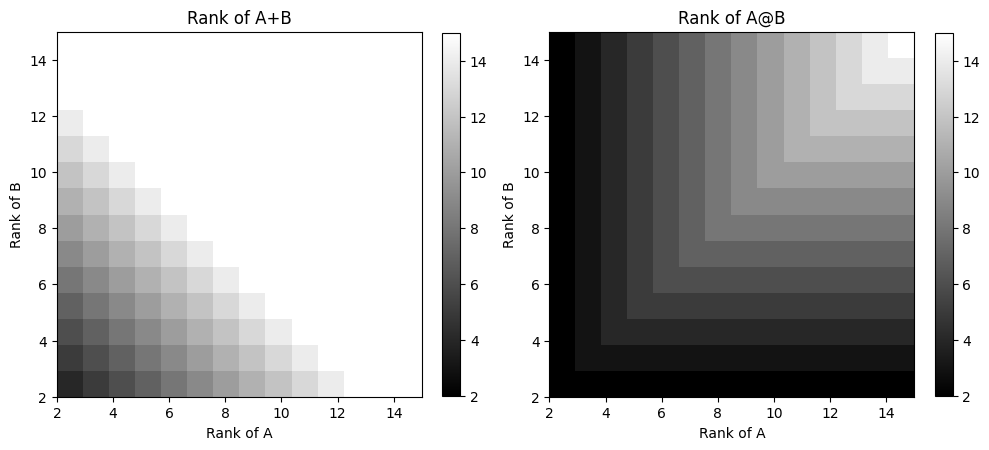

In [175]:
# The function
def makeAmatrix(M,r):
  return np.random.randn(M,r) @ np.random.randn(r,M)


# parameters
matSize = 20 # matrix size (square)
rs = range(2,16) # range of ranks

# initialize results matrix
Ranks = np.zeros((len(rs),len(rs),2))

# run the simulation
for i in range(len(rs)):
    for j in range(len(rs)):

        # create the matrices
        S = makeAmatrix(matSize,rs[i]) + makeAmatrix(matSize,rs[j])
        M = makeAmatrix(matSize,rs[i]) @ makeAmatrix(matSize,rs[j])

        # compute their ranks
        Ranks[i,j,0] = np.linalg.matrix_rank(S)
        Ranks[i,j,1] = np.linalg.matrix_rank(M)



## visualization
fig,axs = plt.subplots(1,2,figsize=(10,6))
s = '+@' # symbols for title

for i in range(2):

  # draw heatmat
  h = axs[i].imshow(Ranks[:,:,i],vmin=np.min(rs),vmax=np.max(rs),origin='lower',
                    extent=(rs[0],rs[-1],rs[0],rs[-1]),cmap='gray')
  
  # add colorbar and other niceties
  fig.colorbar(h,ax=axs[i],fraction=.045)
  axs[i].set_xlabel('Rank of A')
  axs[i].set_ylabel('Rank of B')
  axs[i].set_title(f'Rank of A{s[i]}B')


plt.tight_layout()
plt.show()

**연습 문제 5-8**

- 정답

In [176]:
# matrix sizes and rank
M = 15
N = 8
r = 4

# compute the four matrices
A   = np.random.randn(M,r) @ np.random.randn(r,N)
At  = A.T
AtA = A.T@A
AAt = A@A.T

# print their ranks
print(
    np.linalg.matrix_rank(A),
    np.linalg.matrix_rank(At),
    np.linalg.matrix_rank(AtA),
    np.linalg.matrix_rank(AAt)
)

4 4 4 4


**연습 문제 5-9**

In [188]:
A = np.random.randn(4, 3)
v = np.random.randn(4).reshape(-1, 1)


for i in range(10):
    rank1 = np.linalg.matrix_rank(A)
    B = np.hstack((A, v))
    rank2 = np.linalg.matrix_rank(B)
    if rank1 != rank2:
        print(f'{i} 불일치')
    else:
        print(f'{i} 일치')

0 불일치
1 불일치
2 불일치
3 불일치
4 불일치
5 불일치
6 불일치
7 불일치
8 불일치
9 불일치


In [189]:
A = np.random.randn(4, 4)
v = np.random.randn(4).reshape(-1, 1)


for i in range(10):
    rank1 = np.linalg.matrix_rank(A)
    B = np.hstack((A, v))
    rank2 = np.linalg.matrix_rank(B)
    if rank1 != rank2:
        print(f'{i} 불일치')
    else:
        print(f'{i} 일치')

0 일치
1 일치
2 일치
3 일치
4 일치
5 일치
6 일치
7 일치
8 일치
9 일치


- 정답

In [191]:
# function to run algorithm
def is_V_inColA(A,v):

    # check sizes
    if A.shape[0]!=v.shape[0]:
        raise Exception('Size mismatch! A and v must have the same column dimensionality!.')

    # compute ranks
    rankA  = np.linalg.matrix_rank(A)
    rankAv = np.linalg.matrix_rank( np.hstack((A,v)) )

    # function outputs TRUE if v \in C(A)
    return rankA==rankAv


# create matrix and vector
A = np.random.randn(4,3)
v = np.random.randn(4,1)

# test!
is_V_inColA(A,v)

False

In [192]:
# function to run algorithm
def is_V_inColA(A,v):

    # check sizes
    if A.shape[0]!=v.shape[0]:
        raise Exception('Size mismatch! A and v must have the same column dimensionality!.')

    # compute ranks
    rankA  = np.linalg.matrix_rank(A)
    rankAv = np.linalg.matrix_rank( np.hstack((A,v)) )

    # function outputs TRUE if v \in C(A)
    return rankA==rankAv


# create matrix and vector
A = np.random.randn(4,4)
v = np.random.randn(4,1)

# test!
is_V_inColA(A,v)

True

**연습 문제 5-10**

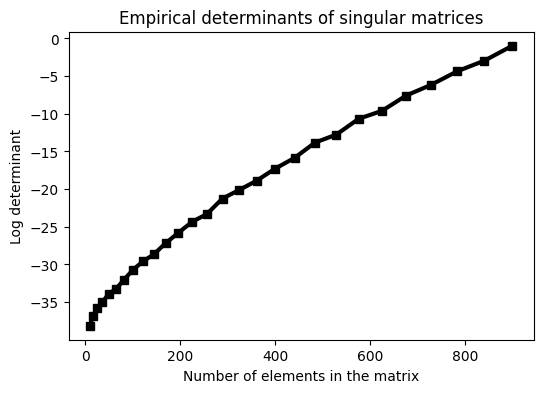

In [193]:
# matrix sizes
ns = np.arange(3,31)

# iteration
iters = 100

# initialize
dets = np.zeros((len(ns),iters))

# loop over matrix sizes
for ni in range(len(ns)):
    for i in range(iters):

        # step 1
        A = np.random.randn(ns[ni],ns[ni])

        # step 2
        A[:,0] = A[:,1]

        # step 3
        dets[ni,i]=np.abs(np.linalg.det(A))


# note: the number of elements in a square matrix is the columns squared


# plotting
plt.figure(figsize=(6,4))
plt.plot(ns**2,np.log(np.mean(dets,axis=1)),'ks-',linewidth=3)
plt.xlabel('Number of elements in the matrix')
plt.ylabel('Log determinant')
plt.title('Empirical determinants of singular matrices')
plt.show()